# Unit 02: Computing with Data in Python

# Outline of ECE 3

The course ECE 3 is organized into 4 units.

- Unit 01: Welcome to Python
- **Unit 02: Computing with Data in Python**
- Unit 03: Summarizing Data in Python
- Unit 04: Predicting from Data with Machine Learning in Python

# Outline of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
      - Orthogonality and linear independence
  - Matrix 
      - Opening data: Python I/O
      - Matrix transpose, addition, subtraction
      - Matrix-vector multiplication
      - Column space, row space, image space, null space, rank
      - Matrix-matrix multiplication
      - Matrix inverse
      - Singular Value Decomposition

# 1. What is a Vector


A vector is roughly "a list of numbers": 

$\rightarrow$ a point in a high-dimensional space

$\rightarrow$ everywhere in modern data and computer programs

$\rightarrow$ the mathematical object which describes how we represent data in a computer


## Lets go through some examples:

### Tabular

Tabular data is structured information organized in rows (observations) and columns (features). We can consider each row as a vector of features or each column as a vector of observations.

<center><img src="figs/01_tabular.jpg" alt="default" width=800px/></center>

**Example:** The *Iris dataset*, collected by botanist Edgar Anderson in the 1930s, is a famous dataset in machine learning and statistics. It contains measurements of sepal and petal dimensions of three iris flower species

In [3]:
import numpy as np
from tabulate import tabulate

# Load the CSV file using NumPy
data = np.genfromtxt('../data/iris.csv', delimiter=',', dtype=str)

# Print the data in a nice tabular format
headers = data[0]  # Assuming the first row contains headers
data = data[1:]     # Exclude the header row from data

# Print the table
print(tabulate(data, headers, tablefmt="pretty"))

+----------------+---------------+----------------+---------------+--------------+
| "sepal.length" | "sepal.width" | "petal.length" | "petal.width" |  "variety"   |
+----------------+---------------+----------------+---------------+--------------+
|      5.1       |      3.5      |      1.4       |      .2       |   "Setosa"   |
|      4.9       |       3       |      1.4       |      .2       |   "Setosa"   |
|      4.7       |      3.2      |      1.3       |      .2       |   "Setosa"   |
|      4.6       |      3.1      |      1.5       |      .2       |   "Setosa"   |
|       5        |      3.6      |      1.4       |      .2       |   "Setosa"   |
|      5.4       |      3.9      |      1.7       |      .4       |   "Setosa"   |
|      4.6       |      3.4      |      1.4       |      .3       |   "Setosa"   |
|       5        |      3.4      |      1.5       |      .2       |   "Setosa"   |
|      4.4       |      2.9      |      1.4       |      .2       |   "Setosa"   |
|   

### Images

Image data consists of visual information represented as pixels in a grid. By flattening this grid we can consider each image as a vector of zeros and ones.

<center><img src="figs/00_image_a.jpg" alt="default" width=1000px/></center>

**Example:** *MNIST* is a widely-used dataset consisting of 28x28 pixel handwritten digits (0-9) created in the late 1990s by Yann LeCun and his colleagues, serving as a benchmark for evaluating image classification algorithms, particularly in the early days of deep learning.

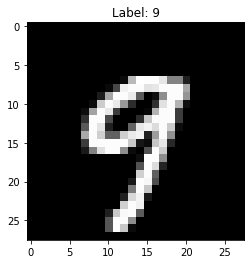

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('../data/', train=True, transform=transform, download=True)

# Get the image data and its label
image_index = 45  # Change this to select a different image
image, label = train_dataset[image_index]

# Display the image
plt.figure()
plt.imshow(image[0], cmap='gray')  # MNIST images are single-channel (grayscale)
plt.title(f"Label: {label}")
plt.show()
print(image)

### Color

In a computer color is represented by three numbers, one for red, green and blue. Thus, each color is a vector in RGB space.

<center><img src="figs/01_rgb_intro.png" alt="default" width=600px/></center>

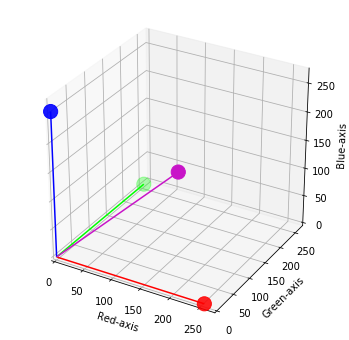

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Define RGB values for different colors
colors = np.array([[255, 0, 0],  # Red
                   [0, 255, 0],  # Green
                   [0, 0, 255]])  # Blue

new_color = np.array([[200, 20, 200]])
colors = np.vstack((colors, new_color))

# Show the 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(colors[:,0], colors[:,1], colors[:,2], s=200, color=colors/255)
ax.quiver(0, 0, 0, colors[:,0], colors[:,1], colors[:,2], color=colors/255, arrow_length_ratio=0)
ax.set_xlim(0, 270); ax.set_ylim(0, 270); ax.set_zlim(0, 270)
ax.set_xlabel("Red-axis"); ax.set_ylabel("Green-axis"); ax.set_zlabel("Blue-axis")
plt.show()

### Other

**Temporal:** Temporal data such as stock prices or covid rates can be represented as a vector of values for equally spaced time intervals.
<center><img src="figs/01_signal_vector.png" alt="default" width=300px/></center>

**Audio:** Audio data repersents sound, typically in the form of a waveform, by various audio properties like amplitude, frequency, and time.
<center><img src="figs/01_audio.png" alt="default" width=300px/></center>

**Text:** A document can be represented as a vector of unique word frequencies. This is called a bag-of-words representation.
<center><img src="figs/01_text.png" alt="default" width=300px/></center>

## Computer science definition of a vector


$\color{#EF5645}{\text{Definition}}$ A _vector_ is an ordered list of numbers:


<center><img src="figs/01_def_vector.png" alt="default" width=500px/></center>

<!-- 
$$\begin{bmatrix}
    -1.1 \\
    0.0 \\
    3.6 \\
    -7.2
\end{bmatrix} \text{ or } \begin{bmatrix}
    -1.1 \\
    0.0 \\
    3.6 \\
    -7.2
\end{bmatrix} \text{ or } (-1.1, 0.0, 3.6, -7.2).$$  -->

The numbers in the list are called: _components, elements, entries, or coefficients_ of the vector.

The number of elements in the list is the _size, dimension, or length_ of the vector. 

If the a vector has dimension $n$, we call it an _$n$-vector_. If a vector has dimension $1$, we call it a _scalar_.

$\color{#EF5645}{\text{Notation}}$: 

We use symbols to denote vectors: $a, \vec{a}$.

The ith element of vector $a$ is written $a_i$.

$\color{#EF5645}{\text{Remark}}$: Remeber, for an n-vector:
  - 😱 in Math: indexes run from $i = 1$ to $i = n$,
  - 😱 in Python: indexes run from $i = 0$ to $i = n - 1$.

## Vectors in Python

$\color{#003660}{\text{In Python}}$, vectors could be represented as
- a "list" of numbers, using `[]`,
- a "tuple" of numbers, using `()`,
- an "array" of numbers, using `np.array()`.

We will always use the `numpy` package to represent vectors because it has multiple functions to easily compute with vectors!

We import a package with `import` functionality.  We rename the package using `as` functionality.

In [88]:
import numpy as np

a = [1, 2, 3]
b = (4, 5, 6)

c = np.array(a)
d = np.array(b)

print(c)
print(d)

[1 2 3]
[4 5 6]


### Accessing vector components

In `numpy`, we "access" the components of a vector just as we do with a list or tuple:

In [45]:
a = np.array([3, 4, 5])
a[0]

3

### Assigning vector components

In `numpy`, components of a vector can be "assigned", as in a list:

In [54]:
a = np.array([1, 2.2, -3., 4.])
a[3] = -2022
a

array([ 1.000e+00,  2.200e+00, -3.000e+00, -2.022e+03])

### Computing vector length

The size/length/dimension of a vector is computed with `len` or `np.size`, (for lists, tuples, and np.arrays)

In [89]:
c = np.array([1, 2, 3])

print(len(a))
print(np.size(c))

3
3


## Speicial Vectors

### Zero Vector

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 0 is denoted $0_n$ or $\vec{0}$ or just $0$ and is called a _zero vector_. 

### Ones Vector

$\color{#EF5645}{\text{Definition}}$: The n-vector with all entries 1 is denoted $1_n$ or $\vec{1}$ or just 1 and is called a _ones-vector_.

### One-Hot Vectors

$\color{#EF5645}{\text{Definition}}$: A _one-hot vector_ or _standard unit vector_ is a vector which has one entry 1 and all others 0. If $i$ is the index of the non-zero entry, we denote it $e_i$.

$\color{#003660}{\text{In Python}}$, we use `zeros` and `ones` (from `numpy`) to build these vectors.

In [91]:
zero2 = np.zeros(100)
print(zero2)

ones4 = np.ones(20)
print(ones4)

e1 = np.zeros(3)
e1[0] = 1
print(e1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 0. 0.]


$\color{#047C91}{\text{Exercise}}$: What are all the one-hot vectors of length 3?

In [80]:
"""Create all one-hot vector of len 3."""

e = np.zeros(3)



## Visualization of vectors

The `matplotlib.pyplot` package contains tools to visualize vectors.

In [3]:
import matplotlib.pyplot as plt

### Visualization: A vector as a point

- A 2-vector $(a_1, a_2)$ can represent:
  - a point on the 2D plane, coordinates: $(a_1, a_2)$. 
 
- An n-vector $(a_1, ..., a_n)$ can represent:
  - a point in the n-D space.

$\color{#003660}{\text{In Python}}$, we use `scatter` to plot points in 2D, thanks to `matplotlib.pyplot`.

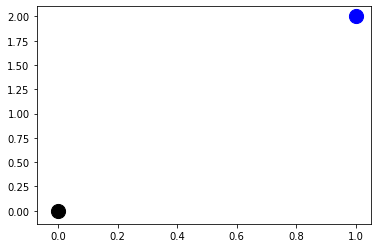

In [92]:
origin = np.zeros(2)
vector = np.array([1, 2])
plt.scatter(origin[0], origin[1], s=200, color="black");
plt.scatter(vector[0], vector[1], s=200, color="blue");

$\color{#003660}{\text{In Python}}$, we use `scatter3D` to plot points in 3D, from `matplotlib.pyplot`.

We also need to tell python that we are going to 3D.

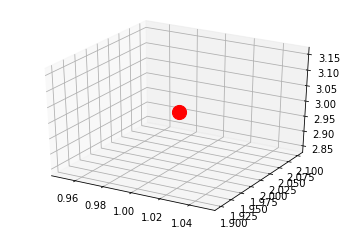

In [82]:
vector = np.array([1, 2, 3])
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(vector[0], vector[1], vector[2], s=200, color="red");

# 2. Operations on Vectors

## Vector Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two vectors a and b can be added/subtracted:
- Addition is denoted a + b; subtraction is denoted a - b.
- Addition/subtraction is computed by adding/subtracting vector elements.

$\color{#047C91}{\text{Exercise}}$: Compute:
<center><img src="figs/01_add.png" alt="default" width=160px/></center>

In [117]:
a = np.array([0, 7, 3])
b = np.array([1, 2, 0])
c = a + b
print(c)

# # If we use lists, it does not give the expected result
# a = [0, 7, 3]
# b = [1, 2, 0]
# c = a + b
# print(c)

[-1  5  3]


$\color{#047C91}{\text{Exercise}}$: Given a vector $a = [1,4,9,20]$ compute $a + 0$

In [86]:
a = np.array([1, 4, 9, 20])
b = np.zeros(np.size(a))
c = a + b
print(c)

[ 1.  4.  9. 20.]


### Properties of Vector Addition

$\color{#6D7D33}{\text{Properties}}$: For any two vectors $a, b$:
- commutativity: a + b = b + a
- associativity: (a + b) + c = a + (b + c) = a + b + c
- additive identity: $a + 0 = a$
- additive inverse: $a - a = 0$

### Interpretation: Adding displacement vectors

If vectors a and b are displacements: 
- a + b is the sum displacement

<center><img src="figs/01_sumvectors.jpg" alt="Drawing" width=450px /></center>

### Interpretation: Displacement from a point to another

If vectors p and q are points:
- p − q is the displacement from q to p


<center><img src="figs/01_subpoints.jpg" width=450px alt="default"/></center>

## Scalar-vector multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and an $n$-vector a can be multiplied to give a new vector: 
$$βa = ( βa_1, . . . , β a_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute:

<center><img src="figs/01_scalar.png" alt="default" width=160px/></center>




In [96]:
a = np.array([1, 9, 6])
beta = -2
print(beta * a)

# # Using lists does not give the expected result
# l = [1, 9, 6]
# print(2 * l)

[1, 9, 6, 1, 9, 6]


### Properties of scalar-vector multiplication

$\color{#6D7D33}{\text{Properties}}$: For scalars  $\beta, \gamma$ and $n$-vectors $a, b$: 
- associativity: $( βγ)a = β(γa)$
- multiplicative identity: $1(a) = a$
- left distributivity: $( \beta + \gamma)a = \beta a + \gamma a$
- right distributivity: $β(a + b) = βa + βb$

$\color{#047C91}{\text{Exercise}}$: Compute the _average_ of two vectors $a$ and $b$?

In [97]:
"""Compute the inner product between a vector and ones vector."""
a = np.array([1,0,2])
b = np.array([1,4,-3])
average = (a + b) / 2
print(average)

[ 1.   2.  -0.5]


## Elementwise-multiplication (Hadamard Product)

$\color{#EF5645}{\text{Definition}}$: Two $n$-vectors $a$ amd $b$ can be multiplied to give a new vector: 
$$a \odot b = ( a_1b_1, . . . , a_nb_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute the hadamard product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

In [98]:
"""Compute the hadamard product of two vectors."""
a = np.array([1,0,2])
b = np.array([-1,1,2])

print(a * b)
print(np.multiply(a, b))

[-1  0  4]
[-1  0  4]


## Inner Product

$\color{#EF5645}{\text{Definition}}$: The inner product (or dot product) of n-vectors a and b is the scalar:
$$a^T b = a_1b_1 + a_2b_2 + · · · + a_nb_n.$$
- Other notations: $〈a, b〉, 〈a|b〉, (a, b), a · b.$
- $\color{#003660}{\text{In Python}}$, we use `inner` or `dot` (from `numpy`).

$\color{#047C91}{\text{Exercise}}$: Compute the inner product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

In [100]:
"""Compute the inner product of two vectors."""
a = np.array([1,0,2])
b = np.array([-1,1,2])

print(np.sum(a * b))
print(np.inner(a, b))
print(np.dot(a,b))

3
3
3


$\color{#047C91}{\text{Exercise}}$: What is the inner product between a vector $a$ and the zero vector?

$$a^T \vec{0} = $$

In [28]:
"""Compute the inner product between a vector and zero vector."""
a = np.array([1,0,2])
b = np.zeros(3)
np.inner(a, b)

0.0

$\color{#047C91}{\text{Exercise}}$: What is the inner product between a vector $a$ and the ones vector?

$$a^T \vec{1} = $$

In [101]:
"""Compute the inner product between a vector and ones vector."""
a = np.array([1,0,2, 4, 2, 4, 2])
b = np.ones(len(a))
print(np.inner(a, b))
print(np.sum(a))

15.0
15


$\color{#047C91}{\text{Exercise}}$: What is the inner product between a vector $a$ and a one-hot vector?

$$a^T \vec{e_i} = $$

In [99]:
"""Compute the inner product between a vector and ones vector."""
a = np.array([1,0,2])
e1 = np.zeros(3)
e1[0] = 1
np.inner(a, e1)

1.0

### Properties of inner product

$\color{#6D7D33}{\text{Properties}}$: For $n$-vectors $a, b, c$ and scalars $\gamma$:
- $a^T b = b^T a$
- $(γa)^T b = γ(a^T b)$
- $(a + b)^T c = a^T c + b^T c$

$\color{#047C91}{\text{Exercise}}$: Write a function that computes the output of the following polynomial using the inner product function:

$$f(x) = 0.1x^5 + 0.8 x^4 - 1.3 x^3 + 1.1 x^2 - 3 x + 5$$

In [103]:
def polynomial(x):
    output = 0.1 * x**5 + 0.8 * x**4
    
    coef = np.array([0.1, 0.8])
    X = np.array([x**5, x**4])
    output = np.dot(a,b)
    return output

print(polynomial(1))

15.0


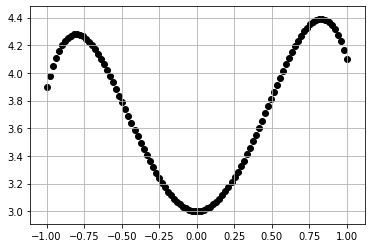

In [106]:
beta = np.array([3,0,4,0.1,-3])
degree = np.size(beta)

def vander(x, degree):
    return np.array([x**p for p in range(degree)])

plt.figure()
xrange = np.linspace(-1,1,100)
for xi in xrange:
    X = vander(xi, 5)
    plt.scatter(xi, np.dot(beta, X), c='k')
plt.grid()
plt.show()

## Norm

$\color{#EF5645}{\text{Definition}}$: The *Euclidean norm*, or just *norm*, of an $n$-vector $x$ is:
$$||x|| = \sqrt{x_1^2 + ... + x_n^2}.$$ 

<!-- = \sqrt{x^Tx} -->

$\color{#EF5645}{\text{Remark}}$: The norm is equal to the absolute value for $n=1$.

$\color{#003660}{\text{In Python}}$, the module `linalg` from the package `numpy` has a function called `norm`.

In [2]:
x = np.array([2, -1, 2])

print(np.linalg.norm(x))

3.0


$\color{#047C91}{\text{Exercise}}$: Can you write a function that computes the norm using the vector operators we have already seen?.

In [107]:
def norm(a):
    return np.sqrt(np.dot(a,a))

x = np.array([2, -1, 2])
print(norm(x))
print(np.linalg.norm(x))

3.0
3.0


### Properties of the Norm

$\color{#6D7D33}{\text{Properties}}$: For any scalar $\beta$ and any $n$-vectors $x, y$:
1. Homogeneity: $||\beta x|| = |\beta|||x||$
2. Triangle inequality: $||x+y|| \leq ||x|| + ||y||$
3. Nonnegative: $||x|| \geq 0$
4. Definite: $||x|| = 0$ if and only if $x = 0$

### Triangle Inequality

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $x$ and $y$, we have the triangle inequality:
$$\|x + y\| \leq \|x\| + \|y\|.$$

$\color{#047C91}{\text{Exercise}}$: Can you prove this inequality using geometrically? 

*hint:* Think about this in 2D.

Notice that given two n-vectors $x$ and $y$ we can make a 2D triangle by connecting these points with the origin and themselves.

<center><img src="figs/01_triangle_inequality.png" alt="Drawing" width=350px/></center>

## Distance

$\color{#EF5645}{\text{Definition}}$: The *Euclidean distance*, or just *distance*, between $n$-vectors $a$ and $b$ is:
$$dist(a, b) = ||a - b||.$$

$\color{#EF5645}{\text{Remark}}$: This definition agrees with ordinary distance for $n = 1, 2, 3.$

## Angle

$\color{#EF5645}{\text{Definition}}$: The _angle_ between two non-zeros $n$-vectors $a$ and $b$ is:
$$\angle(a, b) = arccos\left( \frac{a^Tb}{||a||||b||} \right).$$

$\color{#EF5645}{\text{Remark}}$: It coincides with the ordinary angle in 2D and 3D.

In [115]:
import numpy as np
def angle(a, b):
    product = np.linalg.norm(a)* np.linalg.norm(b)
    fraction = np.inner(a, b) / (product)
    return np.arccos(fraction)

a = [1, -1]
b = [0.1, 1]

print(angle(a, b))
print(np.pi / 2)

2.256525837701183
1.5707963267948966


Write: $\theta = \angle(a, b)$ 
- $θ = π/2 = 90^\circ$: a, b are *orthogonal*: $a ⊥ b$ ($a^T b = 0$) 
- $θ = 0$: a, b are _aligned_ ($a^T b = ‖a‖ ‖b‖$) 
- $θ = π = 180^\circ$: a, b are _anti-aligned_ ($a^T b = −‖a‖ ‖b‖$)
- $θ ≤ π/2 = 90^\circ$: a, b make an _acute angle_ ($a^T b ≥ 0$)
- $θ ≥ π/2 = 90^\circ$: a, b make an _obtuse angle_ ($a^T b ≤ 0$)

<center><img src="figs/03_angles.jpg" alt="default"/></center>

$\color{#047C91}{\text{Exercise}}$: Can you prove why the angle between two vectors takes the form above?

*hint:* remeber the *law of cosines* $c = \sqrt{a^2 + b^2 - 2ab\cos(\gamma)}$

<center><img src="figs/01_law_of_cosines.png" alt="default"/></center>

Again, notice that given two n-vectors $\vec{a}$ and $\vec{b}$ we can make a 2D triangle by connecting these points with the origin and themselves.  Let $A = \vec{a}$, $B = \vec{b}$, and $C = 0$. Now we can apply the law of cosines.  

- $a = \|\vec{b}\|$
- $b = \|\vec{a}\|$
- $c = \|\vec{b} - \vec{a}\| = \sqrt{\|a\|^2 + \|b\|^2 + 2 a^\intercal b}$

Plugging into the expression for the law of cosines and rearannging we get
$$\cos(\gamma) = \frac{a^\intercal b}{\|a\|\|b\|}$$

### Cauchy-Schwarz Inequality

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $a$ and $b$, we have the Cauchy-Schwarz inequality:
$$|a^Tb| \leq ||a||||b||.$$

$\color{#047C91}{\text{Exercise}}$: Can you prove this inequality using our definiton of the angle between two vectors? 

The angle $\angle(a, b)$ is the number in $[0, \pi]$ that satisfies: 
$$a^Tb = ||a||||b||\cos(\angle(a, b)).$$
and $|\cos(\angle(a, b))| \le 1$.

# Unit 02: Computing with Data in Python

## Recap
- Definition of a vector and examples
- Special vectors (Zero, Ones, One-hot)
- Operations on vectors
    - Addition/Subtraction
    - Scalar-Vector multiplication
    - Elementwise Vetor multiplication
    - Inner product
    - Norm and Distance
    - Angle
    
**Textbook:** All the content of unit 2 can be found in parts of chapters 1, 3, 5, 6, 10, 11 of *Introduction to Applied Linear Algebra*. There is a link to the free PDF in the syllabus.

**Office Hours:** Use them!
    
**Problems:** Lets do 10 practice questions.

**Problem 1:** Which of the following python methods will correctly add the two vectors $[3,-2,-1]$ and $[-1,3,6]$?
- First Method
- Second Method

In [122]:
# First method
a = [3, -2, -1]
b = [-1, 3, 6]
sum1 = a + b

# Second method
import numpy as np
a = np.array([3, -2, -1])
b = np.array([-1, 3, 6])
sum2 = a + b

# Print output
# print(sum1)
# print(sum2)

**Problem 2:** If $a = -1$ and $b = [-1,3,6]$, what is the dimension of $ab$?
- 1
- 2
- 3
- The dimensions do not work

In [160]:
a = -1
b = np.array([-1, 3, 6])
c = a * b
print(np.size(c))

**Problem 3:** If $a = [3,-2,-1]$ and $b = [-1,3,6]$, what is the dimension of $a \odot b$?
- 1
- 2
- 3
- The dimensions do not work

In [161]:
a = np.array([3, -2, -1])
b = np.array([-1, 3, 6])
c = a * b
print(np.size(c))

**Problem 4:** If $a = [3,-2,-1]$ and $b = [-1,3,6]$, what is the dimension of $a \centerdot b$?
- 1
- 2
- 3
- The dimensions do not work

In [162]:
a = np.array([3, -2, -1])
b = np.array([-1, 3, 6])
c = np.dot(a, b)
print(np.size(c))

**Problem 5:** If $a = [3,-2,-1]$, $b = [-1,3,6]$, $c=[6,-9,0]$ what is the dimension of $(a \centerdot b) c$?
- 1
- 2
- 3
- The dimensions do not work

In [163]:
a = np.array([3, -2, -1])
b = np.array([-1, 3, 6])
c = np.array([6, -9, 0])
result = np.dot(a, b) * c
print(np.size(result))

**Problem 6:** If $a = [3,-2,-1]$, $b = [-1,3,6]$, $c=[6,-9,0]$ what is the dimension of $a \centerdot (b \odot c)$?
- 1
- 2
- 3
- The dimensions do not work

In [164]:
a = np.array([3, -2, -1])
b = np.array([-1, 3, 6])
c = np.array([6, -9, 0])
result = np.dot(a, b * c)
print(np.size(result))

**Problem 7:** If $a = [3,-2,-1]$, $b = [-1,3,6]$, $c=[6,-9,0]$ what is the dimension of $(a \centerdot b) \centerdot c$?
- 1
- 2
- 3
- The dimensions do not work

In [138]:
a = np.array([3, -2, -1])
b = np.array([-1, 3, 6])
c = np.array([6, -9, 0])
result = np.dot(np.dot(a, b, c))
print(np.size(result))

**Problem 8:** If $a$ is an n-vector, which of the following expressions is true? 
- $\|a\| = a \centerdot a$
- $\|a\| = a \centerdot 1$
- $\|a\| = \sqrt{(a \odot a)}$
- $\|a\| = \sqrt{(a \odot a) \centerdot 1}$

In [143]:
a = np.array([3, -2, -1])

result1 = np.dot(a, a)
result2 = np.dot(a, np.ones(3))
result3 = np.sqrt(a * a)
result4 = np.sqrt(np.dot((a * a), np.ones(3)))

# print(np.linalg.norm(a) == result1)
# print(np.linalg.norm(a) == result2)
# print(np.linalg.norm(a) == result3)
# print(np.linalg.norm(a) == result4)

**Problem 9:** Which of the following expressions is true? 
- $1_n = 0_n \odot 1_n$
- $1_n = e_1 \odot 1_n$
- $1_n = \sum_{i = 1}^n e_i$
- $1_n = \|1_n\| 1_n$

In [154]:
n = 10

def one_hot(i, n):
    ei = np.zeros(n)
    ei[i] = 1
    return ei

result1 = np.zeros(n) * np.ones(n)
result2 = one_hot(1, n) * np.ones(n)

result3 = np.zeros(n)
for i in range(n):
    result3 += one_hot(i, n)
    
result4 = np.linalg.norm(np.ones(n)) * np.ones(n)

# print(np.array_equal(result1, np.ones(n)))
# print(np.array_equal(result2, np.ones(n)))
# print(np.array_equal(result3, np.ones(n)))
# print(np.array_equal(result4, np.ones(n)))

**Problem 10:** What is the angle (in radians) between $a = [0,1,0,1,0]$ and $b = [1,0,1,0,1]$? 
- $\angle(a, b) = 0$
- $\angle(a, b) = \frac{\pi}{2}$
- $\angle(a, b) = \pi$
- $\angle(a, b) = -\frac{\pi}{2}$

In [165]:
def angle(a, b):
    product = np.linalg.norm(a)* np.linalg.norm(b)
    fraction = np.inner(a, b) / (product)
    return np.arccos(fraction)

a = np.array([0,1,0,1,0])
b = np.array([1,0,1,0,1])

print(angle(a, b))

### Angle refresher: 

$\color{#EF5645}{\text{Definition}}$: The _angle_ between two non-zeros $n$-vectors $a$ and $b$ is:
$$\angle(a, b) = arccos\left( \frac{a^Tb}{||a||||b||} \right).$$

$\color{#EF5645}{\text{Remark}}$: It coincides with the ordinary angle in 2D and 3D.

$\color{#EF5645}{\text{Remark}}$: $\angle(a,b) \in [0,\pi]$ and $\angle(a,b) \notin (\pi,2\pi]$. *Hint: consider $\angle (a, b) = \angle(b, a)$?*

$\color{#EF5645}{\text{Remark}}$: Two derive this formula consider the Law of Cosines

**Properties:**

- $θ = 0$: a, b are _aligned_ ($a^T b = ‖a‖ ‖b‖$) 
- $θ ≤ π/2 = 90^\circ$: a, b make an _acute angle_ ($a^T b ≥ 0$)
- $θ = π/2 = 90^\circ$: a, b are at right angles $a ⊥ b$ ($a^T b = 0$) 
- $θ ≥ π/2 = 90^\circ$: a, b make an _obtuse angle_ ($a^T b ≤ 0$)
- $θ = π = 180^\circ$: a, b are _anti-aligned_ ($a^T b = −‖a‖ ‖b‖$)

<center><img src="figs/03_angles.jpg" alt="default"/></center>

$\color{#047C91}{\text{Exercise}}$: Which of the following relationships is true:
- $|a^Tb| \leq ||a||||b||$
- $|a^Tb| = ||a||||b||$
- $|a^Tb| \geq ||a||||b||$

The first statement, $|a^Tb| \leq \|a\|\|b\|$, is true. Using the formula for $\angle(a, b)$ we know,
$$\cos(\angle(a, b))||a||||b|| = a^Tb,$$
which taking the absolute value of both sides, and because $|\cos(\angle(a, b))| \le 1$, shows the statement is true.

### Cauchy-Schwarz Inequality

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $a$ and $b$, we have the Cauchy-Schwarz inequality:
$$|a^Tb| \leq ||a||||b||.$$

## Some Terminology of Vectors


### Unit Vector or Normalized Vector

$\color{#EF5645}{\text{Definition}}$: An $n$-vector $a$ is a *unit vector* or *normalized* if and only if,
$$\|a\| = 1$$

### Orthogonal

$\color{#EF5645}{\text{Definition}}$: If the _angle_ between two non-zeros $n$-vectors $a$ and $b$ is $\frac{\pi}{2}$, then we call these vectors *orthogonal*.  This is true if and only if,
$$a^\intercal b = a \centerdot b = 0.$$

### Orthonormal

$\color{#EF5645}{\text{Definition}}$: Two $n$-vectors $a$ and $b$ are *orthonormal* if and only if they are orthogonal unit vectors,
$$\|a\| = \|b\| = 1 \qquad\text{and}\qquad a \centerdot b = 0.$$

$\color{#047C91}{\text{Exercise}}$: Which of the following pairs of vectors are orthonormal?

- $a = [1,1,1,0]$ and $b = [0,1,1,1]$
- $a = [1,1,0,0]$ and $b = [0,0,1,1]$
- $a = [1,0,0,0]$ and $b = [0,0,0,1]$

In [159]:
a = np.array([1,0,0,0])
b = np.array([0,0,0,1])

# Check that a and b are unit vectors
print(np.linalg.norm(a) == 1)
print(np.linalg.norm(b) == 1)

# Check that a and b are orthgonal
print(np.dot(a,b) == 0)

# 3. Collections of Vectors

### Linear combinations

$\color{#EF5645}{\text{Definition}}$: For a collection of $m$ n-vectors $a_1, . . . , a_m$ and scalars $β_1, . . . , β_m$, the vector defined as

$$β_1a_1 + · · · + β_ma_m$$

is a *linear combination* of the vectors.


$\color{#EF5645}{\text{Remark:}}$ $β_1, . . . , β_m$ are the coefficients.

$\color{#EF5645}{\text{Remark:}}$ Here, $a_i$ is the ith vector in the list of $m$ vectors. It is **not** a component of a vector, it is itself a vector.

In [166]:
"""Write a linear combination of 2 vectors."""
a1 = np.array([1, 2, 3])
a2 = np.array([3, 6, 6])
linear_comb = 2.2 * a1 - 4.7 * a2
linear_comb

array([-11.9, -23.8, -21.6])

### Interpretation: Displacements and Linear Combination

Linear combination $b = 0.75a_1 + 1.5a_2$


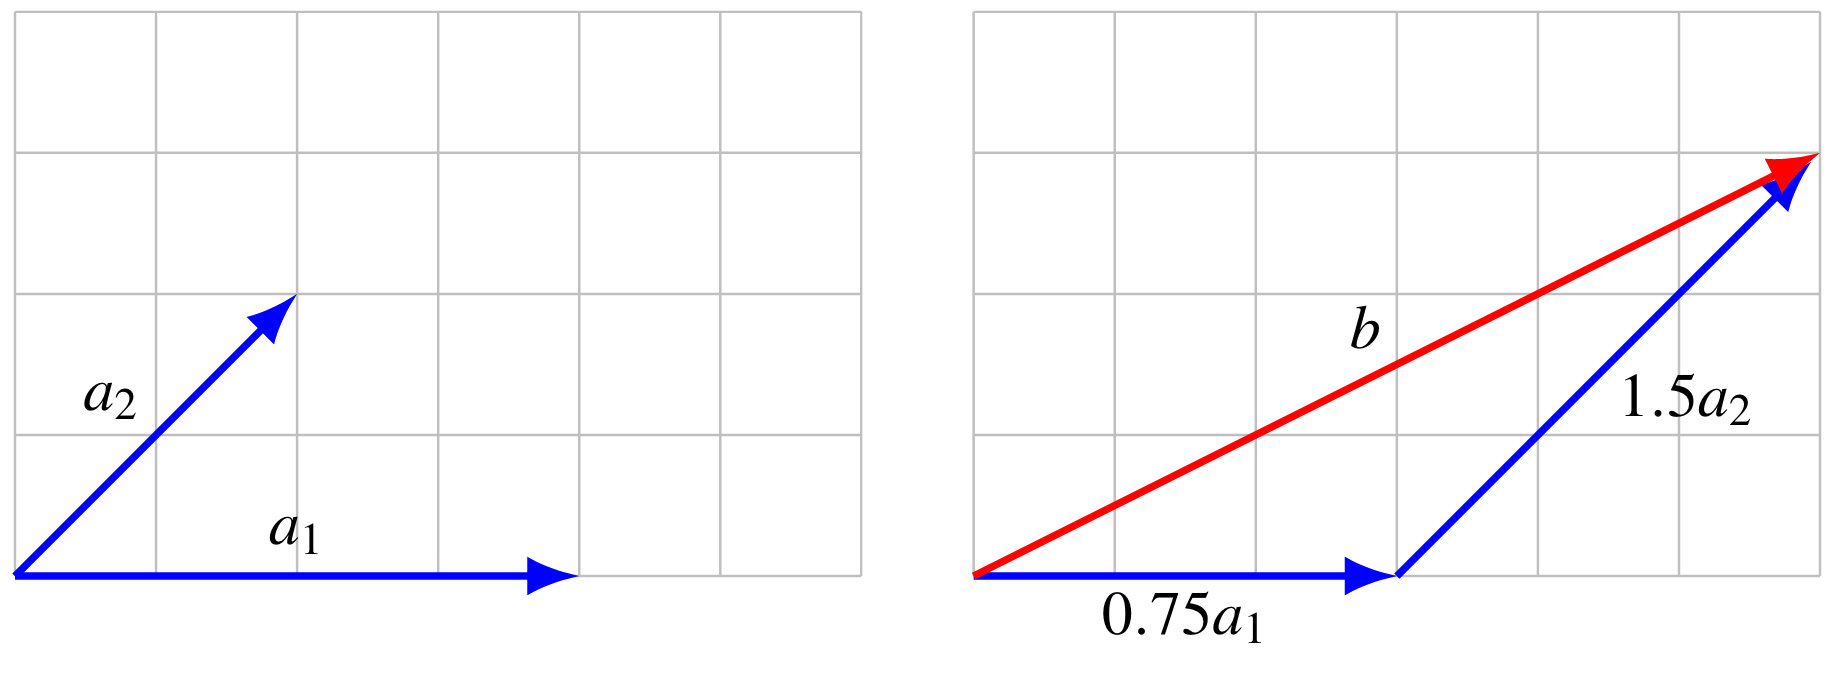

$\color{#047C91}{\text{Exercise}}$: Write an $n$-vector $b = (b_1, ..., b_{n})$ as a linear combination of the one-hot n-vectors $e_1, ..., e_{n}$.

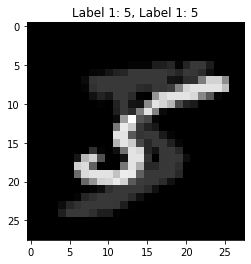

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST('../data/', train=True, transform=transform, download=True)

# Get the image data and its label
image_index_1 = 0  # Change this to select a different image 0 = label 5
image1, label1 = train_dataset[image_index_1]

# Get the image data and its label
image_index_2 = 11  # Change this to select a different image 11 = label 5
image2, label2 = train_dataset[image_index_2]

# Linear Combination
alpha = 0.2
beta = np.array([alpha, 1-alpha])
image = beta[0] * image1 + beta[1] * image2


# Display the image
plt.figure()
plt.imshow(image[0], cmap='gray')  # MNIST images are single-channel (grayscale)
plt.title(f"Label 1: {label1}, Label 1: {label2}")
plt.show()
print(image)

## Special Linear Combinations

There are some special linear combinations that come up enough to have their own names:


$\color{#EF5645}{\text{Definition}}$: The *sum* of $m$ $n$-vector is when $\beta_1 = \dots = \beta_m = 1$. 


$\color{#EF5645}{\text{Definition}}$: The *average* of $m$ $n$-vector is when $\beta_1 = \dots = \beta_m = \frac{1}{m}$. 


$\color{#EF5645}{\text{Definition}}$: An *affine combination* of $m$ $n$-vector is when $\beta_1 + \dots + \beta_m = 1$. 

$\color{#EF5645}{\text{Definition}}$: A *covex combination* of $m$ $n$-vector is when $\beta_1 + \dots + \beta_m = 1$ and $\beta_i \ge 0$ for all $i \in [m]$. 

### Span

$\color{#EF5645}{\text{Definition}}$: The span of $m$ n-vectors $a_1, . . . , a_m$ is the set of all possible linear combinations of the $m$ vectors,

$$\text{span}(a_1, . . . , a_m) = \left\{\beta_1 a_1 + \dots + \beta_m a_m | \forall \beta_i \in \mathbb{R}\right\}$$

$\color{#047C91}{\text{Exercise}}$: What is the span of $e_1 = [1,0,0,0]$?

$\color{#047C91}{\text{Exercise}}$: What is the span of $e_1, e_2$?

$\color{#047C91}{\text{Exercise}}$: What is the span of $e_1, e_2, e_3, e_4$?

$\color{#047C91}{\text{Exercise}}$: What is the span of $e_1, e_2, e_3, e_4, a=[0.1, 2, 4, 2]$?

### Linear Dependence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily dependent* if there exists a vector $a_i$ which can be expressed as a linear combination of the other vectors.

$\color{#EF5645}{\text{Remark:}}$ This is equivlent to saying there exists a vector $a_i$ in the span of the other vectors.

$$\exists a_i \in \text{span}(A \backslash a_i)$$

$\color{#EF5645}{\text{Remark:}}$ This is equivlent to saying there exists coefficients $\beta_1,\dots,\beta_m$ that are **not** all zero such that
$$\beta_1 a_1 + \dots + \beta_m a_m = 0$$

### Linear Independence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily independent* if no vector $a_i$ can be expressed as a linear combination of the other vectors.

$\color{#EF5645}{\text{Remark:}}$ This is equivlent to saying the span of every subset of the vectors is unique.

$\color{#EF5645}{\text{Remark:}}$ This is equivlent to saying the only coefficients $\beta_1,\dots,\beta_m$ such that 
$$\beta_1 a_1 + \dots + \beta_m a_m = 0$$
is when $\beta_1 = \dots = \beta_m = 0$.

### Orthonormal Set

$\color{#EF5645}{\text{Definitions}}$: A set of k $n$-vectors $a_1, . . . , a_k$ form an *orthonormal set* if they are
- _(mutually) orthogonal_ if $a_i ⊥ a_j$ for all $i , j$
- _normalized_ if $‖a_i ‖ = 1$ for $i = 1, . . . , k$

$\color{#6D7D33}{\text{Properties}}$: If $a_1, ..., a_k$ are orthonormal, then:
- $a_i^Ta_j = 0$ if $i\neq j$ and $a_i^Ta_i = 1$,
- $k\leq n$,
- $a_1, ..., a_k$ are linearly independent.

### Basis

$\color{#EF5645}{\text{Definition}}$: A collection of $n$ n-vectors $a_1, . . . , a_n$ is a basis if the collection is linearily independent.

### Orthonormal Basis

$\color{#EF5645}{\text{Definition}}$: A set of $n$ orthonormal $n$-vectors is called an _orthonormal basis_ of $\mathbb{R}^n$.

$\color{#047C91}{\text{Exercise}}$: Do the one-hot vectors $e_1, ...., e_n$ form an orthonormal basis of $\mathbb{R}^n$?

$\color{#047C91}{\text{Exercise}}$: Show that these form an orthonormal basis using Python: 
<!-- $$a_1 = \begin{pmatrix}
    0 \\
    0 \\
    -1 
\end{pmatrix}, \quad a_2 = \begin{pmatrix}
    1 / \sqrt{2} \\
    1 / \sqrt{2} \\
    0
\end{pmatrix} \quad a_3 = \begin{pmatrix}
    1 / \sqrt{2} \\
    -1 / \sqrt{2} \\
    0
\end{pmatrix}$$ -->
<center><img src="figs/05_linearindep.png" width=400px alt="default"/></center>


In [3]:
import numpy as np
a1 = np.array([0, 0, 1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

print(np.inner(a1, a2)) # Do same for a1, a3 and a2, a3
print(np.linalg.norm(a1)) # Do same for a2 and a3

0.0
1.0


### Orthonormal Expansion

$\color{#6D7D33}{\text{Property}}$: If $a_1, . . . , a_n$ is an orthonormal basis of $\mathbb{R}^n$, then:
- Any $n$-vector $x$ can be written:
$$x = (a^T_1 x)a_1 + · · · + (a^T_n x)a_n.$$

$\color{#EF5645}{\text{Definition}}$: The formula above is called _orthonormal expansion of $x$_ in the orthonormal basis. 

## Recap
- Refreshed on operations of vectors
- Orthogonality and Orthonormality
- Linear Combinations and Span
- Linear dependence and independence
- Basis, Orthonormal Basis, Orthonormal Expansion
    
**Reminder:** All the content of unit 2 can be found in parts of chapters 1, 3, 5, 6, 10, 11 of *Introduction to Applied Linear Algebra*. There is a link to the free PDF in the syllabus.

**Next week:** We will talk about matrices!!

## Quick Poll:

1. Should the pace for next week be slower or faster than this week?

2. Do you want to work through more python excerices as a class or should I present more content?

3. How comfortable do you feel using `numpy` and `matplotlib`? Do you want more excercises in lectures or labs?